# Аналитика в авиакомпании

#1. [Описание проекта](#introduction)
#2. [Инструкция по выполнению проекта](#instruction)
#3. [Загрузка и подготовка данных к анализу](#loading)
#4. [Исследовательский анализ данных](#analysis)
#5. [Вывод](#output)

<a name="introduction"></a>
**Описание проекта**

"F9" — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

В нашем распоряжении база данных об авиаперевозках:

datasets1.csv — результат первого запроса. В нём содержится информация о:
* model — модели самолета;
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года;

datasets2.csv — результат третьего запроса. В нём содержится информация о:
* city — городах;
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года;

<a name="instruction"></a>
**Инструкция по выполнению проекта**

Для этих двух наборов данных нужно:
    1. Открыть файл с данными и изучить общую информацию;

    2. Подготовить данные для работы;

    3. Проанализировать данные, а именно:
        * выбрать топ-10 городов по количеству рейсов;
        * построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
        * сделать выводы по каждому из графиков, пояснить результат.
    4. Написать общий вывод.

<a name="loading"></a>
**Шаг 1.** Открыть файл с данными и изучить общую информацию. Подготовить данные к анализу.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

model_flights_amount = pd.read_csv('')
city_average_flights = pd.read_csv('')



In [2]:
#Ознакомимся с таблицей, выведем первые 5 строк
#model_flights_amount.head()

In [3]:
#Ознакомимся с таблицей, выведем первые 5 строк
#city_average_flights.head()

In [4]:
#Проверим тип данных и количество пропусков
model_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


* model - object - строки;
* flights_amount - int64 - целочисленный тип;
* Пропусков нет. Таблица подходит для работы.

In [5]:
#Проверим тип данных и количество пропусков
city_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


* city - object - строки;
* average_flights - int64 - целочисленный тип;
* Пропусков нет. Таблица подходит для работы.

<a name="analysis"></a>
**Шаг 2.** Анализ данных.

In [6]:
#Выберем топ 10 городов по количеству рейсов
city_average_flights = city_average_flights.sort_values(by='average_flights', ascending=False)
#city_average_flights.head(10)

В топ 10 вошли следующие города:
Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

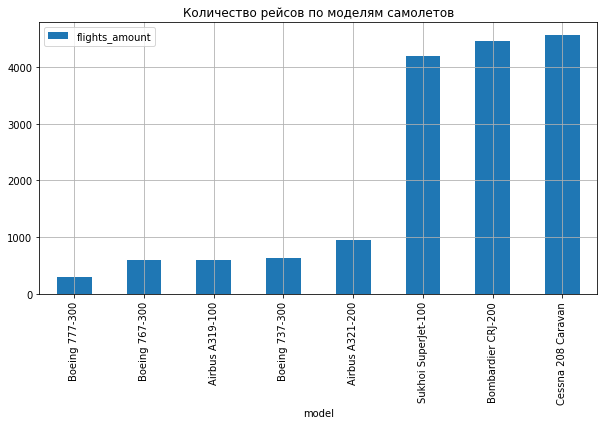

In [7]:
# построим график
model_flights_amount.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='bar', grid=True, figsize=(10, 5),\
    title='Количество рейсов по моделям самолетов');

На графике видно, что в лидерах Cessna 208 Caravan, а вот на Boeing 777-300 совершается меньше всего полетов.

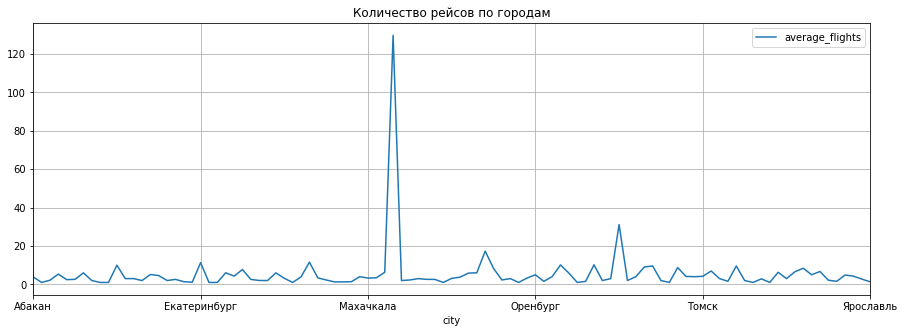

In [8]:
#Построим график для городов и количества рейсов.
city_average_flights.pivot_table(index='city', values='average_flights', aggfunc='sum')\
    .plot(style='-', grid=True, figsize=(15,5), title='Количество рейсов по городам');

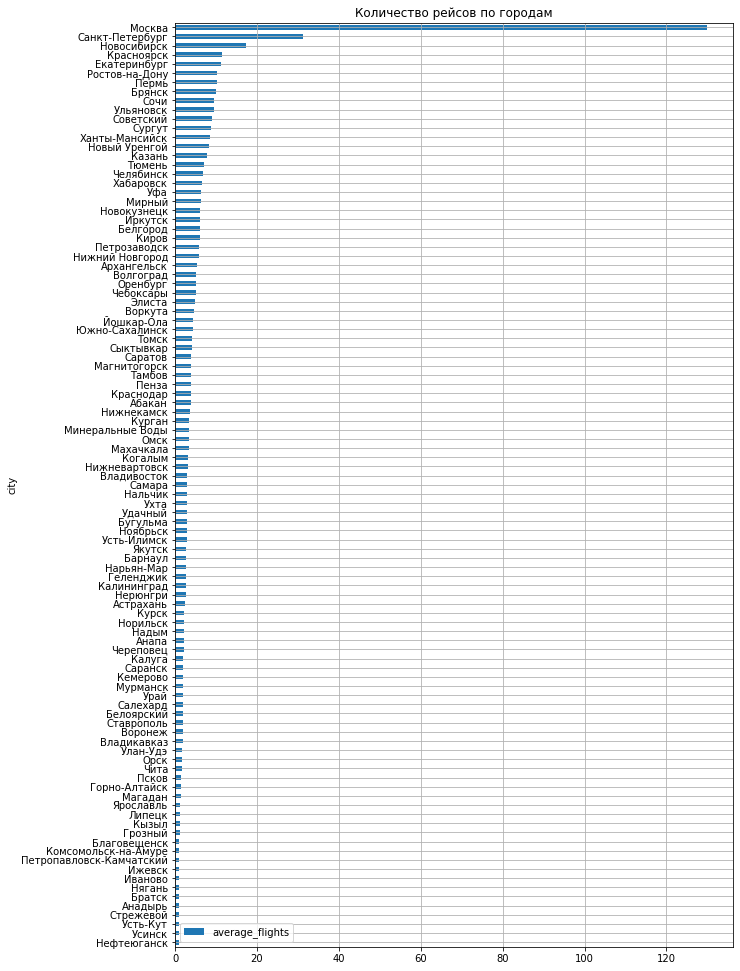

In [9]:
city_average_flights.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 17),\
    title='Количество рейсов по городам');

На данном графике видно, что сильно выделяется Москва) 

In [10]:
#Создадим переменную и запишем в нее топ городов.
top10_city = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Красноярск', 'Екатеринбург', 'Ростов-на-Дону', 'Пермь', 'Брянск', 'Сочи', 'Ульяновск']

In [11]:
city_average_flights_top10 = city_average_flights.sort_values(by='average_flights', ascending=False).head(10)
#city_average_flights_top10

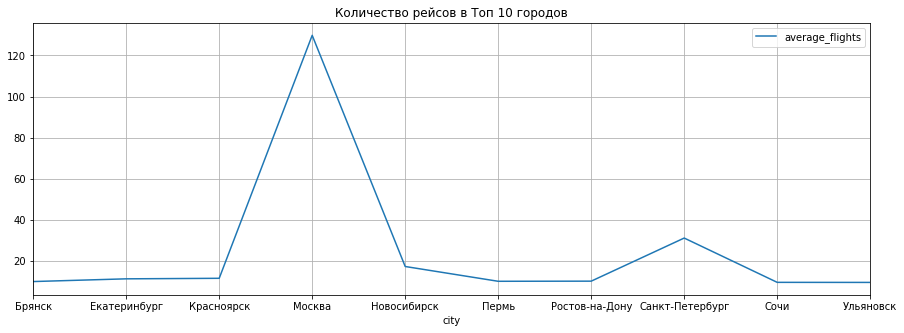

In [12]:
#Построим график для 10 топовых городов.
city_average_flights.query('city == @top10_city')\
    .pivot_table(index ='city', values='average_flights', aggfunc='sum')\
    .plot(style='-', grid=True, figsize=(15,5),title='Количество рейсов в Топ 10 городов');

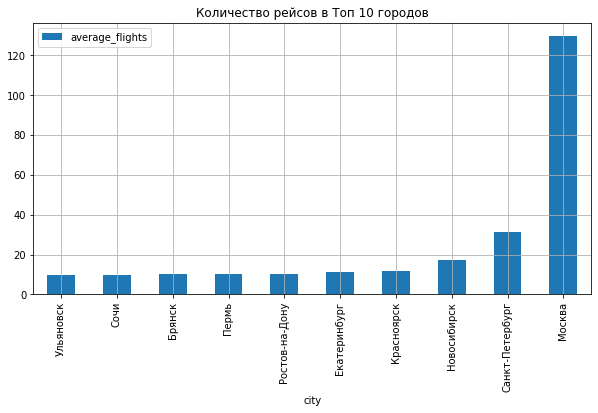

In [13]:
city_average_flights_top10.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(10, 5),\
    title='Количество рейсов в Топ 10 городов');

На графике видно, что Москва очень сильно лидирует по количеству рейсов, на втором месте Санкт-Петербург, остальные города из топ 10 находятся примерно на одинаковых позициях.

<a name="output"></a>
**Шаг 3.** Общий вывод.

Проведя данный анализ мы выяснили:
*Лидеры (модели) по количеству рейсов:*

    Cessna 208 Caravan
Лидером по количеству рейсов является модель самолета Cessna 208 Caravan -  американский лёгкий одномоторный турбовинтовой самолёт общего назначения. Самолеты вместимостью до 10 пассажиров очень востребованы для обслуживания местных линий, в связи с доступностью запчастей и экономической выгодой, так как самолет Cessna заправляется обычным авиационным керосином.
     
     CRJ 200
CRJ 200 канадской компании Bombardier. Этот небольшой 50-местный самолет полностью соответствует потребностям региональных перевозчиков и пассажиров.

    Sukhoi Superjet 100
Sukhoi Superjet 100 (рус. Сухой Суперджет 100) — российский среднемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км. 


*Лидеры (города) по количеству рейсов:*
    
    Москва
Как свидетельствует статистика Росавиации, основная часть пассажиропотока у нас в стране приходится на три московских аэропорта и питерское Пулково. Большинство рейсов из Урала и Сибири выполняется через Москву. Такая ситуация сложилась в связи с тем, что государство не субсидирует межрегиональные перевозки и все затраты ложатся на авиаперевозчика. Соответственно растет цена на билет и автоматически снижается спрос. Авиакомпаниям невыгодно совершать рейсы между городами, гораздо выгоднее летать через Москву.  

*Топ 10 городов по количеству рейсов:*
    * Москва;
    * Санкт-Петербург;
    * Новосибирск;
    * Красноярск;
    * Екатеринбург;
    * Ростов-на-Дону;
    * Пермь;
    * Брянск;
    * Сочи;
    * Ульяновск.
    
Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь - города миллионики, соответственно пассажиропоток в них увеличен.

Брянск попал в топ 10 в связи с наличием военного аэродрома - Сеща. 

Ульяновск славится Ульяновским высшим авиационным училищем гражданской авиации (УВАУГА).Учебно-тренировочные полёты проводятся на аэродромах Ульяновск.

Сочи - город- курорт Краснодарского края. Поток туристов в Сочи не прекращается целый год.